In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import datetime as dt
import seaborn as sns

In [2]:
querydata = pd.read_excel('C:\\Users\\Joanna Kang\\Desktop\\lg_query.xlsx', sheet_name='Keyword Stats 2020-07-29 at (2')
querydata['keywordcount'] = 1

In [3]:
keywordgroup = pd.pivot_table(querydata, values=['Avg. monthly searches', 'keywordcount'], index='Group', aggfunc=sum)
keywordgroup = keywordgroup.sort_values(by='Avg. monthly searches',ascending=False)

In [4]:
x = []
y = []
z = []

for i in range(len(keywordgroup)):
    x.append(keywordgroup.index[i])
    y.append(keywordgroup['Avg. monthly searches'][i]/10)
    z.append(keywordgroup['keywordcount'][i])

In [5]:
querytrend = pd.pivot_table(querydata, values=['Searches: Jul 2019',
       'Searches: Aug 2019', 'Searches: Sep 2019', 'Searches: Oct 2019',
       'Searches: Nov 2019', 'Searches: Dec 2019', 'Searches: Jan 2020',
       'Searches: Feb 2020', 'Searches: Mar 2020', 'Searches: Apr 2020',
       'Searches: May 2020', 'Searches: Jun 2020'], index='Group', aggfunc=sum)       
querytrend.columns = [['Apr 2020', 'Aug 2019', 'Dec 2019', 'Feb 2020', 'Jan 2020', 'Jul 2019', 'Jun 2020', 'Mar 2020', 'May 2020', 'Nov 2019', 'Oct 2019', 'Sep 2019']]

In [6]:
columnslist = ['Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020']
querytrend.columns = querytrend.columns.get_level_values(0)
querytrend = querytrend[columnslist]
querytrend = querytrend.sort_values(by = 'Jun 2020', ascending = False)

In [7]:
main_category = querytrend.loc[['TV', 'Phone','Monitor']]
sub_category = querytrend.loc[['Sound', 'Home theater',
       'Washing Machine', 'Laptop', 'Air conditioner', 'Fridge', 'Smart watch',
       'Accessories', 'Laundry', 'Home', 'Signiture',
       'Replacement']]

Text(0, 0.5, '# of query = Popularity')

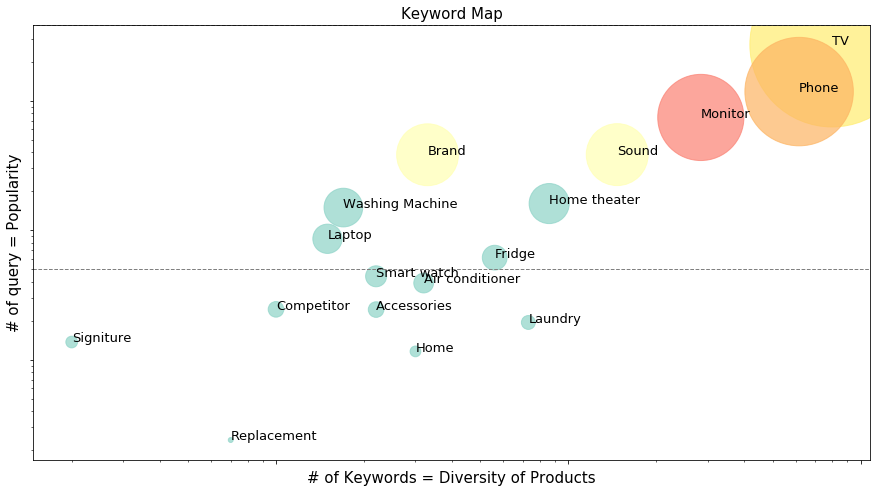

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(z,y, s =y, alpha=0.7, c = y, cmap = 'Set3' )
ax.set_xscale('log')
ax.set_yscale('log')
rectangle = plt.Rectangle((0,500), 1200,38000, fc='None', ec='grey', linestyle ='--')
plt.gca().add_patch(rectangle)

for i, txt in enumerate(x):
    ax.annotate(x[i], xy=(z[i], y[i]), xytext=(z[i], y[i]), fontsize=13)

#plt.scatter(xs, ys, c=ys, cmap="RdYlGn", s=500, edgecolors="black")

    
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.title('Keyword Map', fontsize=15)
ax.set_xlabel('# of Keywords = Diversity of Products', fontsize=15)
ax.set_ylabel('# of query = Popularity', fontsize=15)


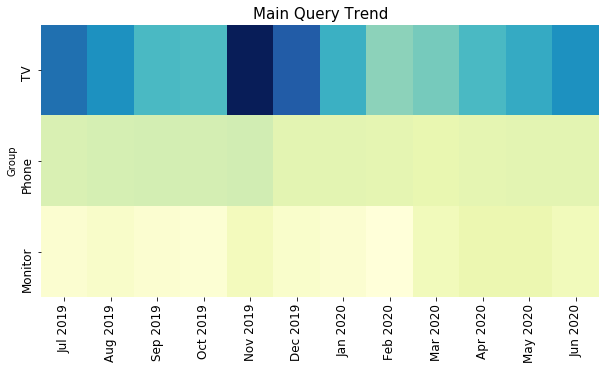

In [9]:
# heatmap by plt.pcolor()
fig, ax = plt.subplots(figsize=(10,5))

def heatmap (chart, title, chartsize, title_size, label_size, colorbar):
    plt.pcolor(chart)
    plt.xticks(np.arange(0.5, len(chart.columns), 1), chart.columns)
    plt.yticks(np.arange(0.5, len(chart.index), 1), chart.index)
    plt.title(title, fontsize=title_size)
    plt.xlabel('Week', fontsize=label_size)
    plt.tick_params(labelsize = label_size)
    sns.heatmap(chart, cmap ='YlGnBu', annot_kws={"fontsize":title_size}, cbar = colorbar, fmt = 'd')
    #sns.heatmap(chart, annot=True, cmap ='YlGnBu', annot_kws={"fontsize":title_size}, cbar = colorbar, fmt = 'd')

heatmap(main_category, 'Main Query Trend', 10, 15, 12, False)

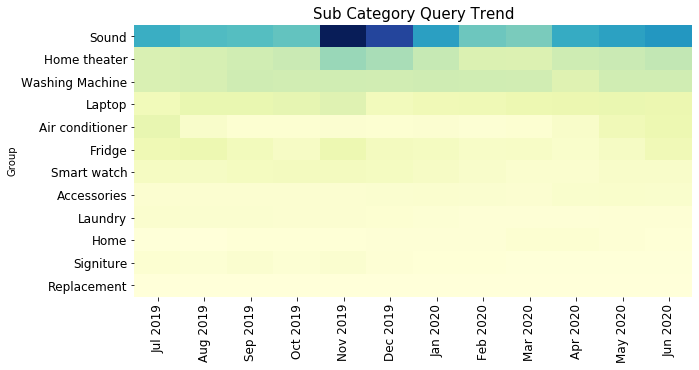

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
heatmap(sub_category, 'Sub Category Query Trend', 10, 15, 12, False)
